In [16]:
%load_ext autoreload
%autoreload 2

import pyattimo
from motiflets.plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# load a dataset, any list of numpy array of floats works fine
# The following call loads the first 100000 points of the ECG 
# dataset (which will be downloaded from the internet)
ts = pyattimo.load_dataset('ecg')
series = ts.flatten()

print("Size of DS: ", series.shape)

Size of DS:  (7824879,)


In [31]:
# Now we can find k-motiflets:
#  - w is the window length
#  - support is the number of subsequences in the motiflet (k in the motiflet paper)
#  - repetitions is the number of LSH repetitions
start = time.time()

m_iter = pyattimo.MotifletsIterator(
    ts, w=1000, max_k=30
)

for m in m_iter:
    print(m.indices)    
    print(m.extent)
    # np.sort(m.indices)
    
end = time.time()
print("Discovered motiflets in", end - start, "seconds")    

[1299, 17355]
1.36117145738654
[1560, 17616, 18912]
1.5316375415879608
[1369, 17425, 18721, 24345]
1.8562003566292395
[1270, 6210, 17326, 21446, 24246]
2.454663800175167


thread '<unnamed>' panicked at /Users/runner/work/attimo/attimo/src/knn.rs:202:13:
assertion failed: prev_cnt <= new_cnt


PanicException: assertion failed: prev_cnt <= new_cnt

Data 7824879
Chosen window-size: motiflet: [1183362, 6662666, 6705710, 6753426, 6988406, 7094262, 7221106, 7465642, 7518890, 7629106, 7816638] extent=0.8084174917375606 in 20.7 s
Elbow Points [7]


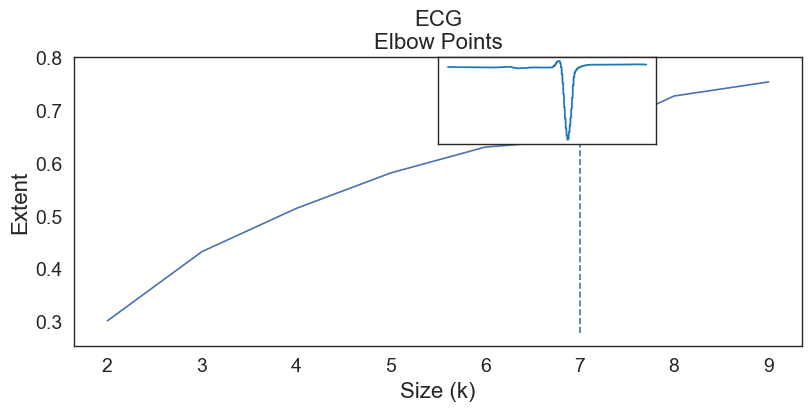

/Users/bzcschae/workspace/motiflets_paper/motiflets/plotting.py:895: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig)
/Users/bzcschae/workspace/motiflets_paper/motiflets/plotting.py:895: UserWarning: The figure layout has changed to tight
  gs.tight_layout(fig)
/Users/bzcschae/workspace/motiflets_paper/motiflets/plotting.py:896: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.show()


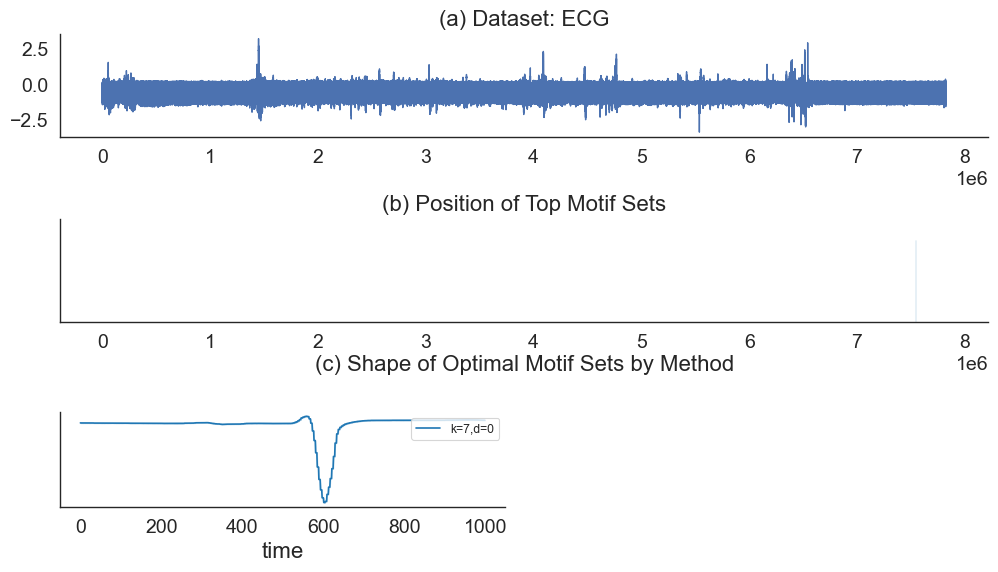

In [35]:
k=10
mot = Motiflets("ECG", series)
_ = mot.fit_k_elbow(k, 1000)

In [ ]:
print(np.sort(mot.motiflets[-1]))
print(mot.dists[-1])

In [4]:
D_full, knns = ml.compute_distance_matrix(series.to_numpy(), 1000, 1)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
print(D_full.shape)
dim_index = np.zeros((D_full.shape[1], 1), dtype=np.int32)

(1, 29001, 29001)


In [9]:
pos = np.sort(m.indices)
print(pos)

ml.get_pairwise_extent(D_full, pos, dim_index)**2


[  481  1445  3909  5073  6385 10245 12605 16273 17501 18797 20221 21621
 22929 24421 27245 28635]


4.258178561202897